# West Nile Virus Data Story_Milestone
https://www.kaggle.com/c/predict-west-nile-virus
#### Instructions:
An introduction to the problem: What is the problem? Who is the Client? (Feel free to reuse points 1-2 from your proposal document)
A deeper dive into the data set:
What important fields and information does the data set have?
What are its limitations i.e. what are some questions that you cannot answer with this data set?
What kind of cleaning and wrangling did you need to do?
Are there other datasets you can find, use and combine with, to answer the questions that matter?
Any preliminary exploration you’ve performed and your initial findings. Test the hypotheses one at a time. Often, the data story emerges as a result of a sequence of testing hypothesis e.g. You first tested if X was true, and because it wasn't, you tried Y, which turned out to be true.
Based on these findings, what approach are you going to take? How has your approach changed from what you initially proposed, if applicable?


#### Main conclusions:
* Yearly fluctuation of number of cases of WN virus detection .
* August is the month with the most occurrences of West Nile Virus(WNV), but it also has the most samples in the dataset.
* No obvious correlation between number of mosquitos trapped and detection of WNV
* No obvious correlation bewteen locations and detection of WNV






In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy import stats
% matplotlib inline

### Check dataset

In [2]:
# load data and check the data form
# train dataset
train = pd.read_csv('train.csv')
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,5/29/2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,5/29/2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [3]:
print 'train dataset number of variables:',len(train.columns),'\n\n', train.dtypes,'\n'
print 'tran dataset number of rows:',len(train)

train dataset number of variables: 12 

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

tran dataset number of rows: 10506


In [4]:
# test dataset
test = pd.read_csv('test.csv')
test.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [5]:
print 'test dataset number of variables:',len(test.columns), '\n\n', test.dtypes,'\n'
print 'test dataset number of rows:', len(test)

test dataset number of variables: 11 

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object 

test dataset number of rows: 116293


In [6]:
# spray dataset
spray = pd.read_csv('spray.csv')
spray.head(2)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [7]:
print 'spray dataset number of variables:', len(spray.columns),'\n\n', spray.dtypes

spray dataset number of variables: 4 

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object


In [8]:
# weather dataset
weather = pd.read_csv('weather.csv')
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,5/1/2007,83,50,67,14,51,56,0,2,...,,0,M,0,0,29.1,29.82,1.7,27,9.2
1,2,5/1/2007,84,52,68,M,51,57,0,3,...,,M,M,M,0,29.18,29.82,2.7,25,9.6


In [9]:
print 'weather dataset number of variables:', len(weather.columns),'\n\n', weather.dtypes

weather dataset number of variables: 22 

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object


### Temporal information of WN virus detection

In [10]:
# Extract year, month and week from data
traindf = train
traindf['year'] = pd.DatetimeIndex(traindf['Date']).year
traindf['month'] = pd.DatetimeIndex(traindf['Date']).month
traindf['week'] = pd.DatetimeIndex(traindf['Date']).week

In [11]:
# Count number of cases for each week in each year
years = list(sorted(set(traindf['year'])))
weeks = list(sorted(set(traindf['week'])))
countsweek = [[0 for x in range(len(weeks))] for x in range(len(years))]
for iy,iyear in enumerate(years):
    for iw,iweek in enumerate(weeks):
        yearweek = traindf.loc[(traindf['year']==iyear) & (traindf['week'] == iweek)]
        countsweek[iy][iw] = sum(yearweek['WnvPresent'])

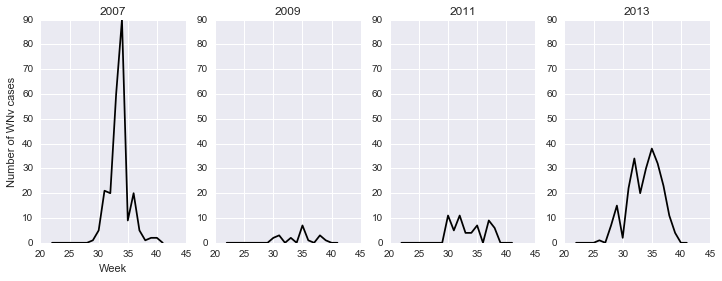

In [12]:
# plot cases for each week in each year
ymax = max(countsweek[0])

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,4))
ax1.plot(weeks,countsweek[0],'k')
ax1.set_title(years[0])
ax1.set_ylabel('Number of WNv cases')
ax1.set_xlabel('Week')

ax2.plot(weeks,countsweek[1],'k')
ax2.set_title(years[1])
ax2.set_ylim([0,ymax])

ax3.plot(weeks,countsweek[2],'k')
ax3.set_title(years[2])
ax3.set_ylim([0,ymax])

ax4.plot(weeks,countsweek[3],'k')
ax4.set_title(years[3])
ax4.set_ylim([0,ymax])

fig.savefig('TemporalVisual.png',dpi = 300)
plt.show()

    

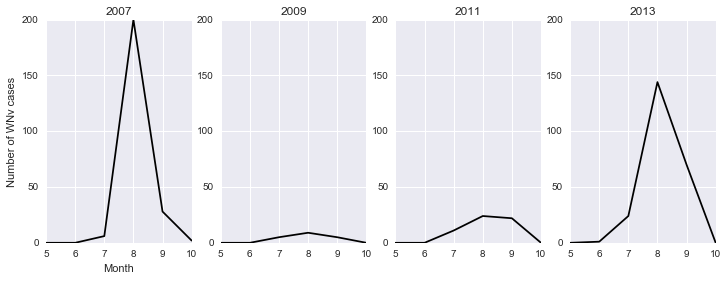

In [13]:
# Count number of cases for each week in each year
months = list(sorted(set(traindf['month'])))
countsmonth = [[0 for x in range(len(months))] for x in range(len(years))]
for iy,iyear in enumerate(years):
    for im,imonth in enumerate(months):
        yearmonth = traindf.loc[(traindf['year']==iyear) & (traindf['month'] == imonth)]
        countsmonth[iy][im] = sum(yearmonth['WnvPresent'])
# plot cases for each month in each year
ymax = max(countsmonth[0])

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,4))
ax1.plot(months,countsmonth[0],'k')
ax1.set_title(years[0])
ax1.set_ylabel('Number of WNv cases')
ax1.set_xlabel('Month')

ax2.plot(months,countsmonth[1],'k')
ax2.set_title(years[1])
ax2.set_ylim([0,ymax])

ax3.plot(months,countsmonth[2],'k')
ax3.set_title(years[2])
ax3.set_ylim([0,ymax])

ax4.plot(months,countsmonth[3],'k')
ax4.set_title(years[3])
ax4.set_ylim([0,ymax])

fig.savefig('TemporalVisualmonth.png',dpi = 300)
plt.show()

### Spatial information of WN virus detection

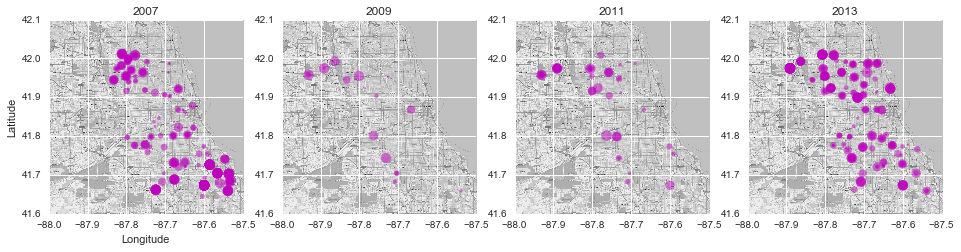

In [14]:
# for each year display the location where WN virus was detected
# http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
# http://stackoverflow.com/questions/10969113/how-do-i-change-the-scale-of-imshow-in-matplotlib-without-stretching-the-image
mapdata = np.loadtxt('mapdata_copyright_openstreetmap_contributors.txt')
#plt.imshow(mapdata, cmap = plt.get_cmap('gray'))

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (16,5))
axs = [ax1,ax2,ax3,ax4]
for iy,iyear in enumerate(years):
    iaxs = axs[iy]
    iaxs.imshow(mapdata,extent =[-88,-87.5,41.6, 42.1],cmap = plt.get_cmap('gray'))
    #iaxs.axis('off')
    yeardf = traindf.loc[(traindf['year'] == iyear)&(traindf['WnvPresent']==1)]
    lat = yeardf['Latitude']
    lng = yeardf['Longitude']
    mosnum = yeardf['NumMosquitos']*2
    iaxs.scatter(lng,lat,alpha =0.5,color = 'm',s =  mosnum)
    #iaxs.plot(lng,lat,'.', color = 'y')
    iaxs.set_xlim([-88,-87.5])
    iaxs.set_ylim([41.6,42.1])
    if iy == 0:
        iaxs.set_xlabel('Longitude')
        iaxs.set_ylabel('Latitude')
    iaxs.set_title(iyear)

plt.savefig('SpatialVisual.png',dpi = 300)
plt.show()

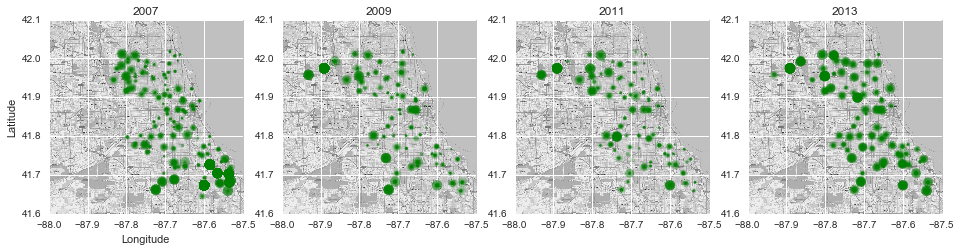

In [15]:
# for each year display the location where WN virus was detected
# http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
# http://stackoverflow.com/questions/10969113/how-do-i-change-the-scale-of-imshow-in-matplotlib-without-stretching-the-image
mapdata = np.loadtxt('mapdata_copyright_openstreetmap_contributors.txt')
#plt.imshow(mapdata, cmap = plt.get_cmap('gray'))

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (16,5))
axs = [ax1,ax2,ax3,ax4]
for iy,iyear in enumerate(years):
    iaxs = axs[iy]
    iaxs.imshow(mapdata,extent =[-88,-87.5,41.6, 42.1],cmap = plt.get_cmap('gray'))
    #iaxs.axis('off')
    yeardf = traindf.loc[(traindf['year'] == iyear)&(traindf['NumMosquitos']>0)]
    lat = yeardf['Latitude']
    lng = yeardf['Longitude']
    mosnum = yeardf['NumMosquitos']*2
    iaxs.scatter(lng,lat,alpha =0.1,color = 'g',s =  mosnum)
    #iaxs.plot(lng,lat,'.', color = 'y')
    iaxs.set_xlim([-88,-87.5])
    iaxs.set_ylim([41.6,42.1])
    if iy == 0:
        iaxs.set_xlabel('Longitude')
        iaxs.set_ylabel('Latitude')
    iaxs.set_title(iyear)

plt.savefig('SpatialVisualMosNum.png',dpi = 300)
plt.show()

### Relationship between type of mosquitos and detection of WN virus
* West virus was prensented in Mosquitos: CULEX PIPIENS and CULEX RESTUANS
* Two species of Culex mosquitoes are common throughout much of North America. Culex restuans Theobold is a native species, whereas Culex pipiens L. is a European immigrant that has been in North America since the 1600s.
http://ee.oxfordjournals.org/content/early/2015/06/26/ee.nvv094

In [16]:
# types of mosquitos
mos = train.Species
mostype = set(mos)

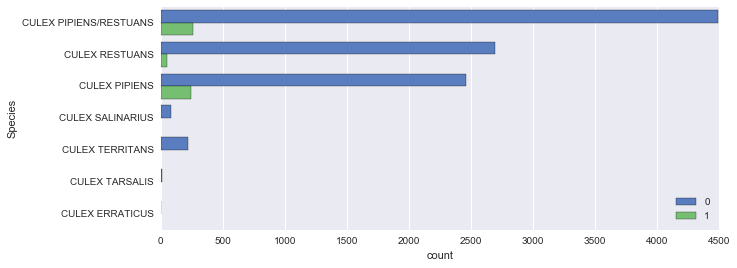

In [18]:
# add new columns for each element of categorical data of mosquitos species
sns.set(font_scale = 1)
fig,ax = plt.subplots(figsize = (10,4))
sns.countplot(y = 'Species', hue = 'WnvPresent',data = train, palette = 'muted')
plt.legend(loc = 'lower right')
plt.savefig('MostypeWNvirus.png',dpi = 800)
plt.show()
